In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() 

import numpy as np

from IPython.display import display, HTML

In [2]:
# *****EVALUATOR--PLEASE READ BELOW!!*****

    # I imagine that you've seen approximately 58290743895743 of these  
    # I'll try to keep it simple and use a font that otherwise wouldn't be in a notebook 
    # That way if you see this weird color you know "hey, I should look here"

# *****EVALUATOR--PLEASE READ ABOVE!!*****


def look_here_color_heading(text, heading=0, bold=False, italics=False, color="#17E425"): # tip of the cap to https://stackoverflow.com/a/63519665, https://www.w3schools.com/cssref/pr_font_font.php, and http://www.unm.edu/~tbeach/IT145/color.html#:~:text=HTML%20used%20to%20recognize%2016,recognize%20147%20CSS3%20color%20names. 
    """Format text based on HTML tags
    
    Args: 
        * text (str): the text you want the heading to say when you're done with it
        * heading (int): <H{heading}> you want
        * bold (boolean, optional): whether text is to be bolded.  Default True
        * italics (boolean, optional): whether text is to be italicized.  Default True
        * color (str): defaults to green that I chose, can alter if absolutely necessary
    
    Returns:
        * formatted string to be displayed by IPython
    """
    
#     groovy_green = "#17E425"
#     kings_purple = "#5A2D81" # tip of the cap to https://teamcolorcodes.com/sacramento-kings-color-codes/#:~:text=The%20Sacramento%20Kings%20colors%20HEX,team%20can%20be%20found%20below.
    
    if bold and italics:
        output =  f'<h{heading} style="color: {color}; font-weight: bold; font-style: italic;">{text}</h{heading}>'
    if bold:
        output =  f'<h{heading} style="color: {color}; font-weight: bold;">{text}</h{heading}>'
    if italics:
        output =  f'<h{heading} style="color: {color}; font-style: italic;">{text}</h{heading}>'
    else:
        output =  f'<h{heading} style="color: {color};">{text}</h{heading}>'
    
    display(HTML(output))

In [3]:
# import csv
df = pd.read_csv("C:/Users/nick_/_WGU/D207/Jupyter Notebook/churn_clean.csv", index_col=0)

In [4]:
# set notebook up to display all col names
pd.set_option('display.max_columns', None) 

In [5]:
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [6]:
original_dataset_cols_set = set(df.columns.tolist()) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [8]:
df.duplicated().value_counts() # confirms no duplicate rows in df

False    10000
dtype: int64

In [9]:
len(df)-len(df.drop_duplicates())

0

In [10]:
# identify all quantitative columns for purposes of working with data therein later on

# done manually on my part
quant_cols = [
    "Population", 
    "Children", 
    "Age", 
    "Income", 
    "Outage_sec_perweek",
    "Email",
    "Contacts",
    "Yearly_equip_failure",
    "Tenure",
    "MonthlyCharge",
    "Bandwidth_GB_Year"
]

quant_cols

['Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

In [11]:
# exclude from cleaning per assignment instructions, and therefore from re-encoding
exclude_from_cleaning = [
    "UID",
    "CaseOrder", 
    "Customer_id",
    "Interaction", 
    "City",
    "State", 
    "County", 
    "Zip", 
    "Lat",
    "Lng",
]

# manually excluding "Job" as well due to length of out results
# will evaluate "Job" separately directly below other fields
exclude_from_cleaning.append("Job")

exclude_from_cleaning

['UID',
 'CaseOrder',
 'Customer_id',
 'Interaction',
 'City',
 'State',
 'County',
 'Zip',
 'Lat',
 'Lng',
 'Job']

In [12]:
qual_cols_dict = dict() 

for c in df.columns:
    if c not in exclude_from_cleaning:
        if c not in quant_cols:
            qual_cols_dict[c] = df[c].unique().tolist()
        else:
            continue
            
# all qualitative values besides "Job"
qual_cols_dict

{'Area': ['Urban', 'Suburban', 'Rural'],
 'TimeZone': ['America/Sitka',
  'America/Detroit',
  'America/Los_Angeles',
  'America/Chicago',
  'America/New_York',
  'America/Puerto_Rico',
  'America/Denver',
  'America/Menominee',
  'America/Phoenix',
  'America/Indiana/Indianapolis',
  'America/Boise',
  'America/Kentucky/Louisville',
  'Pacific/Honolulu',
  'America/Indiana/Petersburg',
  'America/Nome',
  'America/Anchorage',
  'America/Indiana/Knox',
  'America/Juneau',
  'America/Toronto',
  'America/Indiana/Winamac',
  'America/Indiana/Vincennes',
  'America/North_Dakota/New_Salem',
  'America/Indiana/Tell_City',
  'America/Indiana/Marengo',
  'America/Ojinaga'],
 'Marital': ['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced'],
 'Gender': ['Male', 'Female', 'Nonbinary'],
 'Churn': ['No', 'Yes'],
 'Techie': ['No', 'Yes'],
 'Contract': ['One year', 'Month-to-month', 'Two Year'],
 'Port_modem': ['Yes', 'No'],
 'Tablet': ['Yes', 'No'],
 'InternetService': ['Fiber Optic', 'D

In [13]:
qual_cols_dict["Job"] = df["Job"].unique().tolist()

qual_cols_dict["Job"]

['Environmental health practitioner',
 'Programmer, multimedia',
 'Chief Financial Officer',
 'Solicitor',
 'Medical illustrator',
 'Chief Technology Officer',
 'Surveyor, hydrographic',
 'Sales promotion account executive',
 'Teaching laboratory technician',
 'Museum education officer',
 'Teacher, special educational needs',
 'Maintenance engineer',
 'Engineer, broadcasting (operations)',
 'Learning disability nurse',
 'Automotive engineer',
 'Amenity horticulturist',
 'Applications developer',
 'Immunologist',
 'Engineer, electrical',
 'Broadcast presenter',
 'Counsellor',
 'Geophysical data processor',
 'Designer, multimedia',
 'Event organiser',
 'Equality and diversity officer',
 'Psychiatrist',
 'Surveyor, commercial/residential',
 'Civil Service administrator',
 'Radiographer, diagnostic',
 'Air traffic controller',
 'Dietitian',
 'Therapist, occupational',
 'Building services engineer',
 'Information officer',
 'Outdoor activities/education manager',
 'Market researcher',
 'Sur

In [14]:
df.isnull().sum().sort_values(ascending=False)

Customer_id             0
Port_modem              0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
Item1                   0
Item2                   0
Item3                   0
Item4                   0
Item5                   0
Item6                   0
Item7                   0
Tablet                  0
Contract                0
Interaction             0
Techie                  0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children    

In [15]:
# descriptive statistics for later on, if necessary.
df[quant_cols].describe().loc[["count","25%","50%","75%", "mean"]]   
    # 50% is indeed the median, see confirmation in next cel

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000,10000.0000,10000.000,10000.000000,10000.000000,10000.000000
25%,738.0000,0.0000,35.0000,19224.717500,8.018214,10.000,0.0000,0.000,7.917694,139.979239,1236.470827
50%,2910.5000,1.0000,53.0000,33170.605000,10.018560,12.000,1.0000,0.000,35.430507,167.484700,3279.536903
75%,13168.0000,3.0000,71.0000,53246.170000,11.969485,14.000,2.0000,1.000,61.479795,200.734725,5586.141370
mean,9756.5624,2.0877,53.0784,39806.926771,10.001848,12.016,0.9942,0.398,34.526188,172.624816,3392.341550


In [16]:
cols_with_missing_values = df.isnull().sum() > 0

# create a list of said cols to be parsed through
cols_with_missing_values_list = cols_with_missing_values[cols_with_missing_values>0].index.tolist()

cols_with_missing_values_list

[]

In [17]:
categorical_missing_values = []

for c in cols_with_missing_values_list:
    if c in quant_cols:
        f, ax_hist = plt.subplots()
    
        # histogram setup
        sns.histplot(x=df[c], ax=ax_hist)
        ax_hist.set(title="", xlabel="") # tip of the hat to https://python-charts.com/matplotlib/title/#:~:text=Adding%20titles%20in%20matplotlib%20with%20title%20and%20set_title,-Matplotlib%20allows%20adding&text=The%20difference%20between%20these%20two,approach%20you%20want%20to%20use.
        ax_hist.set_title(label=c, weight="bold", fontsize="x-large") # tip of the hat to https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
 
    else:
        categorical_missing_values.append(c)
        
plt.tight_layout()    
plt.show();

<Figure size 432x288 with 0 Axes>

***NOTE--NO MISSING VALUES IN THIS DATASET SO SKIPPING THIS STEP***

In [18]:
# Manually classify quantitative variable cols as either normal distribution or non-normal distribution

# missing_values_normal_dist = ["Age"]

# missing_values_non_normal_dist = ["Children", "Income", "Tenure", "Bandwidth_GB_Year"]

# missing_values_normal_dist, missing_values_non_normal_dist

***NOTE--NO MISSING VALUES IN THIS DATASET SO SKIPPING THIS STEP***

In [19]:
# for col_cat in categorical_missing_values:
#     print(f'Mode of {col_cat}: "{df[col_cat].mode()[0]}"')

# print("")

# for col_norm in missing_values_normal_dist:
#     print(f'Median of {col_norm}: "{df[col_norm].median()}"')
    

# print("")


# for col_non_norm in missing_values_non_normal_dist:
#     print(f'Median of {col_non_norm}: "{df[col_non_norm].median()}"')

In [20]:
# this function is what we will use to fill in null data
df_orphans = pd.DataFrame() # new df where nulls and eventually outliers will go

new_cols_nulls_removed_set = set() # so we can iterate through this as necessary later on

def fill_nulls(columns_with_nulls, statistical_test):
    """Fill null values based on statistical test provided in function call
    
    Args:
        * columns_with_nulls (list): before running this function, categorize cols with nulls into one of the following:
            * categorical
            * normally distributed quantitative
            * non-normally quantitative
        * statistical_test (str): pass in either "median", "mean", or "mode"
            * General thought is to use "median" for quantitative and "mode" for qualitative unless you have a good reason to do otherwise
    Output: 
        * creates new col in df (col_with_nulls) 
            * if intersection of row and col has value, that value passed over to new col
            * if intersection of row and col does *not* have a value, statistical_test value passed over to new col
    """
   
    for col in columns_with_nulls:
        addnl_col = col + "_with_nulls"
        statistical_test = statistical_test.lower()
        
        condition = df[col].isnull() # creating condition we're going to loc within the df           
        
        if statistical_test == "mode":
            df_orphans[addnl_col] = df[col]         
            df.loc[condition, col] = df[col].mode()[0] # new value if meets condition
            
            new_cols_nulls_removed_set.add(addnl_col)
          
        elif statistical_test == "median" or statistical_test == "mean":
            s_test = getattr(df[col], statistical_test) # need to do this since test is being passed as a kwarg # tip of the cap to https://stackoverflow.com/questions/31112742/why-should-i-ever-use-getattr
            s_test_val = s_test() # in order to actually create an instance of median() or mean()
                        
            df_orphans[addnl_col] = df[col]
            df.loc[condition, col] = s_test_val 
            
            new_cols_nulls_removed_set.add(addnl_col)
                                 
        else:
            print("Error: choose from following: mean, median, mode")

***NOTE--NO MISSING VALUES IN THIS DATASET SO SKIPPING FOLLOWING STEPS***

In [21]:
# categorical_missing_values

In [22]:
# missing_values_normal_dist

In [23]:
# missing_values_non_normal_dist

In [24]:
# # handle nulls in categorical data
# fill_nulls(categorical_missing_values,"mode")

# # handle nulls in uniformly distributed quantitative data
# fill_nulls(missing_values_normal_dist,"median")

# # handle nulls in non-normally distributed quantitative data
# fill_nulls(missing_values_non_normal_dist,"median")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

*End treatment of null values; begin treatment of outliers*

In [26]:
outlier_dict = dict()

cols_with_outliers = set()
cols_without_outliers = set()

# create set containing rows with *any* outlier, regardless of how it is to be treated
rows_to_handle = set()

def find_outliers(quant_cols):
    """
    Iterate through quantitative cols to create a dictionary with following values for each column key:
        * Interquartile range
        * Q1 value
        * Q3 value
        * CaseOrder value for each row outside the interquartile range, expressed as a list
    
   Args:  
        * quant_cols (list): a list of all quantitative cols you wish to find outliers from
    """
        
    for q in quant_cols:
            
        # calculate outlier values
        # quartile 1 and quartlie 3 values
        q3 = df[q].describe().loc["75%"]
        q1 = df[q].describe().loc["25%"]

        # interquartile range value
        iqr = q3-q1

        # calculating upper and lower values, outside of which will be outliers
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        # calculating number of outliers per each numerical col
        lower_outliers = len(df.loc[df[q] < lower_bound])
        upper_outliers = len(df.loc[df[q] > upper_bound])

        num_outliers = lower_outliers + upper_outliers

        # if col has outliers, add to list to be looked at closer
        if num_outliers > 0:
            cols_with_outliers.add(q)
        else:
            cols_without_outliers.add(q)
        
        # print number of outliers and breakdown between high or low
        print(f"{q} # of outliers: {num_outliers}")
        print(f"     Num high: {upper_outliers}")
        print(f"     Num low: {lower_outliers}")
        print("")
        
        
        # identify outlier rows based on calculations above
        outlying_rows = df.loc[df[q] < lower_bound].index.tolist() + df.loc[df[q] > upper_bound].index.tolist()

        # update dict with figures used in caluclation and affected rows
        outlier_dict.update({
            q:{
                "IQR": iqr,
                "Lower Limit (Q1 * -1.5)": lower_bound,
                "Upper Limit (Q3 * 1.5)": upper_bound,
                "Rows With Outliers": outlying_rows
            }
        })
        

    for k in outlier_dict.keys():
        for v in outlier_dict[k]["Rows With Outliers"]:
            rows_to_handle.add(v)
     
    return cols_with_outliers, cols_without_outliers

In [27]:
def create_charts(quant_cols, df=df):
    """
    Creates a boxplot and a histogram showing the distribution of a quantitative value
    
    Args:
        quant_cols (list):
            * list of quantitative cols that you want to create charts for
            * can create charts one col at a time, just make sure it is a list
    
    """
    
    # histogram and boxplot for each quantitative variable (prior to handling nulls)

    for q in quant_cols: # tip of the cap to https://stackoverflow.com/questions/50773877/create-for-loop-to-plot-histograms-for-individual-columns-of-dataframe-with-seab/50774730#50774730 and https://aparnamishra144.medium.com/data-visualization-in-a-loop-using-seaborn-and-matplotlib-499ee540726d
        f, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True)

        # histogram setup
        sns.histplot(x=df[q], ax=ax_hist)
        ax_hist.set(label="", xlabel="", ylabel="") # tip of the cap to https://stackoverflow.com/questions/42406233/how-to-add-a-title-to-a-seaborn-boxplot/60088930#60088930

        # boxplot setup
        sns.boxplot(x=df[q], orient="h", ax=ax_box)
        ax_box.set_title(label=q, weight="bold", fontsize="x-large")
        ax_box.set(xlabel="");

    plt.tight_layout()    
    plt.show()

In [28]:
def outlier_output_charts(quant_cols):
    """
    In addition to functionality of create_charts() and find_outliers(), prints col's upper and lower limit
    
    Args:
        quant_cols (list):
            * list of quantitative cols that you want to create charts for
            * can create charts one col at a time, just make sure it is a list
    
    """
    
    for q in quant_cols:
        create_charts(quant_cols)
    
        find_outliers(quant_cols)
        
        upper_limit = outlier_dict[q]["Upper Limit (Q3 * 1.5)"]
        print(f"Upper limit for {q}: {upper_limit:,.2f}")
        
        
        lower_limit = outlier_dict[q]["Lower Limit (Q1 * -1.5)"]
        print(f"Lower limit for {q}: {lower_limit:,.2f}")  
        print("")

        return upper_limit, lower_limit

In [29]:
# charts showing that there are no outliers among these cols, per the results of find_outliers() above
create_charts(cols_without_outliers)

<Figure size 432x288 with 0 Axes>

In [30]:
# these are the variables we'll focus our attention on 
cols_with_outliers

set()

In [31]:
# regardless of how col to be handled, it will go in this dict
handle_values_dict = {} 
    # syntax:
        # {col_name}: {"mean"/"median"/"retain"/"exclude"/"remove"}

Using **impute--median** for **Population**

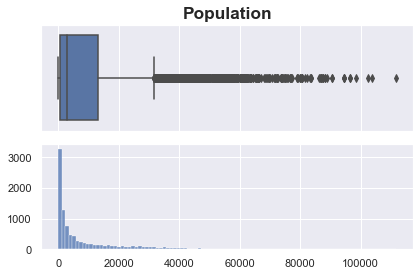

Population # of outliers: 937
     Num high: 937
     Num low: 0

Upper limit for Population: 31,813.00
Lower limit for Population: -17,907.00



(31813.0, -17907.0)

In [32]:
outlier_output_charts(["Population"])

In [33]:
handle_values_dict.update({"Population": "median"})
handle_values_dict

{'Population': 'median'}

Using **retain** for **Children**

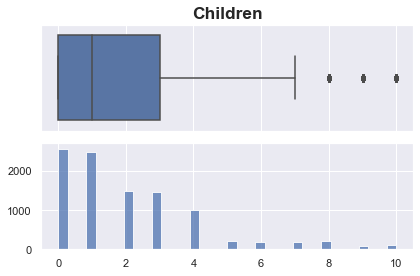

Children # of outliers: 401
     Num high: 401
     Num low: 0

Upper limit for Children: 7.50
Lower limit for Children: -4.50



(7.5, -4.5)

In [34]:
outlier_output_charts(["Children"])

In [35]:
handle_values_dict.update({"Children": "retain"})
handle_values_dict

{'Population': 'median', 'Children': 'retain'}

Using **retain** for **Income**

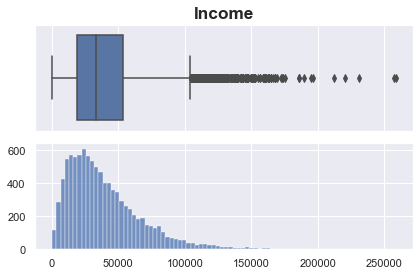

Income # of outliers: 336
     Num high: 336
     Num low: 0

Upper limit for Income: 104,278.35
Lower limit for Income: -31,807.46



(104278.34875, -31807.46125)

In [36]:
outlier_output_charts(["Income"])

In [37]:
handle_values_dict.update({"Income": "retain"})
handle_values_dict

{'Population': 'median', 'Children': 'retain', 'Income': 'retain'}

Using **impute--median** for **Outage_sec_perweek**

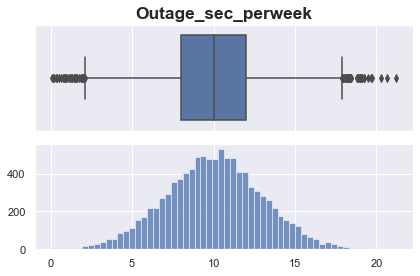

Outage_sec_perweek # of outliers: 76
     Num high: 43
     Num low: 33

Upper limit for Outage_sec_perweek: 17.90
Lower limit for Outage_sec_perweek: 2.09



(17.8963915, 2.0913075)

In [38]:
outlier_output_charts(["Outage_sec_perweek"])

In [39]:
handle_values_dict.update({"Outage_sec_perweek": "median"})
handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median'}

Using **retain** for **Email**

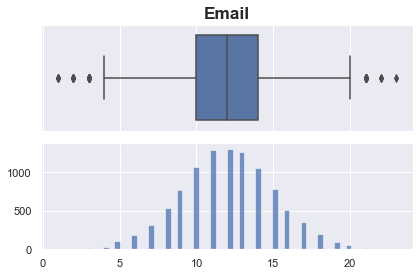

Email # of outliers: 38
     Num high: 15
     Num low: 23

Upper limit for Email: 20.00
Lower limit for Email: 4.00



(20.0, 4.0)

In [40]:
outlier_output_charts(["Email"])

In [41]:
handle_values_dict.update({"Email": "retain"})
handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median',
 'Email': 'retain'}

Using **retain** for **Contacts**

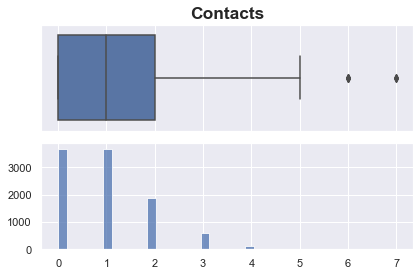

Contacts # of outliers: 8
     Num high: 8
     Num low: 0

Upper limit for Contacts: 5.00
Lower limit for Contacts: -3.00



(5.0, -3.0)

In [42]:
outlier_output_charts(["Contacts"])

In [43]:
handle_values_dict.update({"Contacts": "retain"})
handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median',
 'Email': 'retain',
 'Contacts': 'retain'}

Using **retain** for **Yearly_equip_failure**

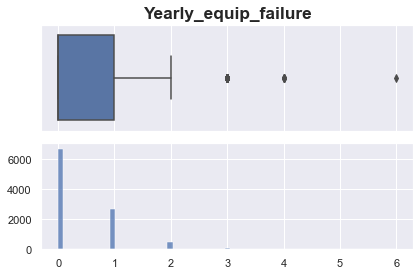

Yearly_equip_failure # of outliers: 94
     Num high: 94
     Num low: 0

Upper limit for Yearly_equip_failure: 2.50
Lower limit for Yearly_equip_failure: -1.50



(2.5, -1.5)

In [44]:
outlier_output_charts(["Yearly_equip_failure"])

In [45]:
handle_values_dict.update({"Yearly_equip_failure": "retain"})
handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median',
 'Email': 'retain',
 'Contacts': 'retain',
 'Yearly_equip_failure': 'retain'}

Using **retain** for **MonthlyCharge**

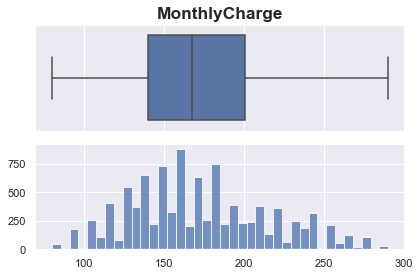

MonthlyCharge # of outliers: 0
     Num high: 0
     Num low: 0

Upper limit for MonthlyCharge: 291.87
Lower limit for MonthlyCharge: 48.85



(291.867954, 48.84601000000002)

In [46]:
outlier_output_charts(["MonthlyCharge"])

In [47]:
handle_values_dict.update({"MonthlyCharge": "retain"})
handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median',
 'Email': 'retain',
 'Contacts': 'retain',
 'Yearly_equip_failure': 'retain',
 'MonthlyCharge': 'retain'}

In [48]:
handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median',
 'Email': 'retain',
 'Contacts': 'retain',
 'Yearly_equip_failure': 'retain',
 'MonthlyCharge': 'retain'}

In [49]:
new_cols_outliers_removed_set = set() # so we can iterate through this as necessary later on

def handle_outliers(handle_values_dict):
    """
    Handles one of the following per column:
        * leaves column be, as outliers have been deemed acceptable to retain
        * creates new column, imputing the outlying data points with the statistical method chosen by user while retaining all non-outlier values
        * excludes entire row outlier belongs to; removes said row from main df and puts it into a new df
        * removes entire row outlier belongs to from main df
    
    Args:
        * handle_values_dict (dict):
            * Before running this function, create a dict with all columns that have outliers you want to handle.
            * You will have to make a judgement call as to which of the following you want to do:
                * "retain" -- does not change any data within the col
                * "mean" -- imputes mean value from col
                * "median" -- imputes median value from col
                * "mode" -- imputes mode from col
                * "exclude" -- removes row from main df to a separate df
                * "remove" -- removes row from main df completely
          
        * Make sure that you are using the "no_nulls" col if there is both an original and modified col
            
    """

    df_exclude = pd.DataFrame()

    for k, v in handle_values_dict.items():
        addnl_col = k + "_with_outliers"
        v = v.lower()
                
        condition = df.index.isin(outlier_dict[k]["Rows With Outliers"]) 
        
        if v == "retain":
            continue # no change to df since we're keeping everything
        
        if v == "mean" or v == "median":
            s_test = getattr(df[k], v) # need to do this since test is being passed as a kwarg # tip of the cap to https://stackoverflow.com/questions/31112742/why-should-i-ever-use-getattr
            s_test_val = s_test() # in order to actually create an instance of median() or mean()

            df_orphans[addnl_col] = df[k] # create new col in df_orphans and move over data with outliers to it # tip of the cap to https://datagy.io/pandas-conditional-column/ for using df.loc[] and conditions
            
            df.loc[condition, k] = s_test_val # fill in any outliers found within col with mean/median as specified in function call
            
            new_cols_outliers_removed_set.add(addnl_col) # add to set to keep track of outlier cols created
            
        if v == "exclude":
            excluded_rows = df.loc[condition].copy() # grab all rows that fit condition above since they will be added to df_orphans, then 
            
            df_exclude = pd.concat([df_exclude, excluded_rows]) # tip of the cap to https://stackoverflow.com/questions/67139564/concatenate-dataframe-in-pandas
            df.drop(index=excluded_rows.index, inplace=True)

        if v == "remove":
            df.drop(index = df.loc[condition].index, inplace=True) # delete inplace
   
    return df_exclude # we'll be able to see this upon output, and we can assign the funciton call to a variable as desired

In [50]:
#function call
df_exclude = handle_outliers(handle_values_dict)
df_exclude

""


In [51]:
# handle_values_dict
outlier_dict

{'Population': {'IQR': 12430.0,
  'Lower Limit (Q1 * -1.5)': -17907.0,
  'Upper Limit (Q3 * 1.5)': 31813.0,
  'Rows With Outliers': [12,
   17,
   30,
   45,
   52,
   57,
   58,
   67,
   75,
   86,
   88,
   91,
   101,
   103,
   111,
   121,
   124,
   142,
   157,
   158,
   164,
   172,
   204,
   213,
   216,
   218,
   232,
   241,
   242,
   257,
   258,
   260,
   263,
   276,
   286,
   292,
   315,
   324,
   352,
   353,
   361,
   373,
   380,
   385,
   386,
   395,
   427,
   433,
   437,
   442,
   443,
   446,
   465,
   469,
   499,
   529,
   530,
   556,
   559,
   578,
   588,
   590,
   593,
   599,
   605,
   622,
   645,
   647,
   656,
   663,
   739,
   741,
   745,
   748,
   772,
   775,
   780,
   802,
   822,
   830,
   837,
   838,
   852,
   856,
   870,
   891,
   898,
   907,
   970,
   986,
   991,
   1002,
   1044,
   1086,
   1097,
   1108,
   1114,
   1132,
   1151,
   1157,
   1160,
   1163,
   1174,
   1187,
   1192,
   1196,
   1212,
   1219,
 

In [52]:
df_orphans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Population_with_outliers          10000 non-null  int64  
 1   Outage_sec_perweek_with_outliers  10000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 492.4 KB


In [53]:
cols_with_missing_values_list

[]

In [54]:
cols_with_outliers

{'Children',
 'Contacts',
 'Email',
 'Income',
 'Outage_sec_perweek',
 'Population',
 'Yearly_equip_failure'}

In [55]:
cols_handled = set(cols_with_missing_values_list).union(cols_with_outliers)
cols_handled

{'Children',
 'Contacts',
 'Email',
 'Income',
 'Outage_sec_perweek',
 'Population',
 'Yearly_equip_failure'}

In [56]:
df_orphans[sorted(df_orphans.columns.tolist())].info() # tip of the cap to https://learnpython.com/blog/sort-alphabetically-in-python/

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Outage_sec_perweek_with_outliers  10000 non-null  float64
 1   Population_with_outliers          10000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 492.4 KB


In [57]:
new_cols_outliers_removed_set

{'Outage_sec_perweek_with_outliers', 'Population_with_outliers'}

In [58]:
final_viz_dict = {}

for col_base in set(df.columns.tolist()):
    
    if col_base not in quant_cols:
        continue
    
    if col_base + "_with_nulls" in new_cols_nulls_removed_set:
        col_null = col_base + "_with_nulls"
        
        if col_base not in final_viz_dict:
            final_viz_dict[col_base] = [col_null]
        else:
            final_viz_dict[col_base].append(col_null)
        
    if col_base + "_with_outliers" in new_cols_outliers_removed_set:
        col_out = col_base + "_with_outliers"
        
        if col_base not in final_viz_dict:
            final_viz_dict[col_base] = [col_out]
        
        else:
            final_viz_dict[col_base].append(col_out)            


In [59]:
# all of the original quantitative columns
quant_cols

['Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

In [60]:
# the columns that we ended up handling nulls and/or outliers in
final_viz_dict

{'Outage_sec_perweek': ['Outage_sec_perweek_with_outliers'],
 'Population': ['Population_with_outliers']}

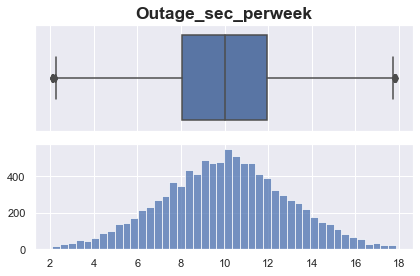

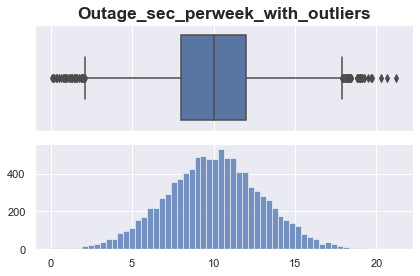

               Original median value: 10.01856
               Cleaned median value: 10.01856



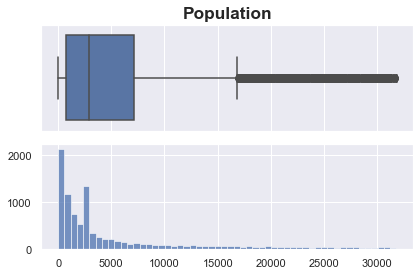

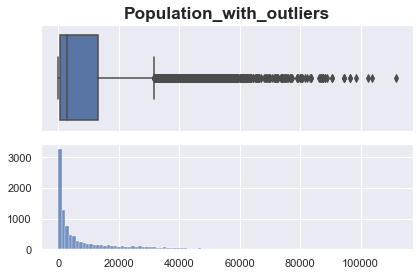

               Original median value: 2910.5
               Cleaned median value: 2909.75



In [61]:
for k, val in final_viz_dict.items():
    for v in val:    
        create_charts([k])
        create_charts(val, df=df_orphans)
    
        print(f'               Original median value: {df_orphans[[v]].describe().loc[["50%"]].iloc[0,0]}') # tip of the cap to https://www.statology.org/pandas-describe-only-mean-std/
        print(f'               Cleaned median value: {df[[k]].describe().loc[["50%"]].iloc[0,0]}')
        print("")

In [62]:
df.to_csv("C:/Users/nick_/_WGU/D207/Jupyter Notebook/churn_data_clean_parker.csv")
print("Successfully saved to CSV")

Successfully saved to CSV


## End cleaning data, now on to D207 portion of code

In [63]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [64]:
vars_needed_to_answer_question = [
    "Customer_id",
    "InternetService",
    "Phone",
    "Multiple",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Tenure"
]


In [65]:
df[vars_needed_to_answer_question]

,Customer_id,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tenure
CaseOrder,,,,,,,,,,,
1,K409198,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,6.795513
2,S120509,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,1.156681
3,K191035,DSL,Yes,Yes,No,No,No,No,No,Yes,15.754144
4,D90850,DSL,Yes,No,Yes,No,No,No,Yes,No,17.087227
5,K662701,Fiber Optic,No,No,No,No,No,Yes,Yes,No,1.670972
...,...,...,...,...,...,...,...,...,...,...,...
9996,M324793,DSL,Yes,Yes,No,Yes,Yes,No,No,No,68.197130
9997,D861732,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,61.040370
9998,I243405,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,47.416890


In [79]:
dependent_var = "Tenure"

# formula = dependent_var ~ C(var1) + C(var2) + C(var1):C(var2)

num = 0
    
for v in vars_needed_to_answer_question:
    if v != dependent_var:
        var = "var"+str(num + 1)
        var 
        
    ### need to create new variable for each col name, and that needs to increase by 1 every iteration
    ### then once all vars have been created, need to be importable into "formula" above
        
        
        print("var"+str(num + 1))
        
        
#     else:
#         print("Found dependent var")
#         continue


#     formula = 'Tenure ~ C

SyntaxError: cannot assign to operator (56228111.py, line 9)

In [74]:
if "Tenure" not in vars_needed_to_answer_question:
    print("Not in list")
else:
    print("Is in list")

Is in list


In [71]:
"Tenure" not in vars_needed_to_answer_question

False